In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gogajayasankeerth","key":"b7784026843be2d57242465840da623f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images -p /content/


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0


In [ ]:
!unzip /content/lung-and-colon-cancer-histopathological-images.zip -d /content/lung_and_colon_cancer_data


Streaming output truncated to the last 5000 lines.
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: /content/lung_and_colon_cancer

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn opencv-python


In [ ]:
import os

dataset_path = '/content/lung_and_colon_cancer_data'
if os.path.exists(dataset_path):
    print("Dataset Path Found!")
    for root, dirs, files in os.walk(dataset_path):
        print(f"Directory: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Number of images: {len(files)}")
        print('-' * 30)
else:
    print("Dataset path not found. Please check the extraction path.")


Dataset Path Found!
Directory: /content/lung_and_colon_cancer_data
Subdirectories: ['lung_colon_image_set']
Number of images: 0
------------------------------
Directory: /content/lung_and_colon_cancer_data/lung_colon_image_set
Subdirectories: ['colon_image_sets', 'lung_image_sets']
Number of images: 0
------------------------------
Directory: /content/lung_and_colon_cancer_data/lung_colon_image_set/colon_image_sets
Subdirectories: ['colon_n', 'colon_aca']
Number of images: 0
------------------------------
Directory: /content/lung_and_colon_cancer_data/lung_colon_image_set/colon_image_sets/colon_n
Subdirectories: []
Number of images: 5000
------------------------------
Directory: /content/lung_and_colon_cancer_data/lung_colon_image_set/colon_image_sets/colon_aca
Subdirectories: []
Number of images: 5000
------------------------------
Directory: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets
Subdirectories: ['lung_n', 'lung_scc', 'lung_aca']
Number of images: 0


In [ ]:
import os

dataset_path = '/content/lung_and_colon_cancer_data/lung_colon_image_set'

def search_for_folders(path):
    for root, dirs, files in os.walk(path):
        if 'lung' in root.lower() or 'colon' in root.lower():
            print(f"Found Folder: {root}")

search_for_folders(dataset_path)


Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/colon_image_sets
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/colon_image_sets/colon_n
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/colon_image_sets/colon_aca
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc
Found Folder: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_aca


In [ ]:
!find /content -type d -name "*lung*"


/content/lung_and_colon_cancer_data
/content/lung_and_colon_cancer_data/lung_colon_image_set
/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets
/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n
/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc
/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_aca


In [ ]:
folder_path = '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_n'
print("Folder exists:", os.path.exists(folder_path))


Folder exists: False


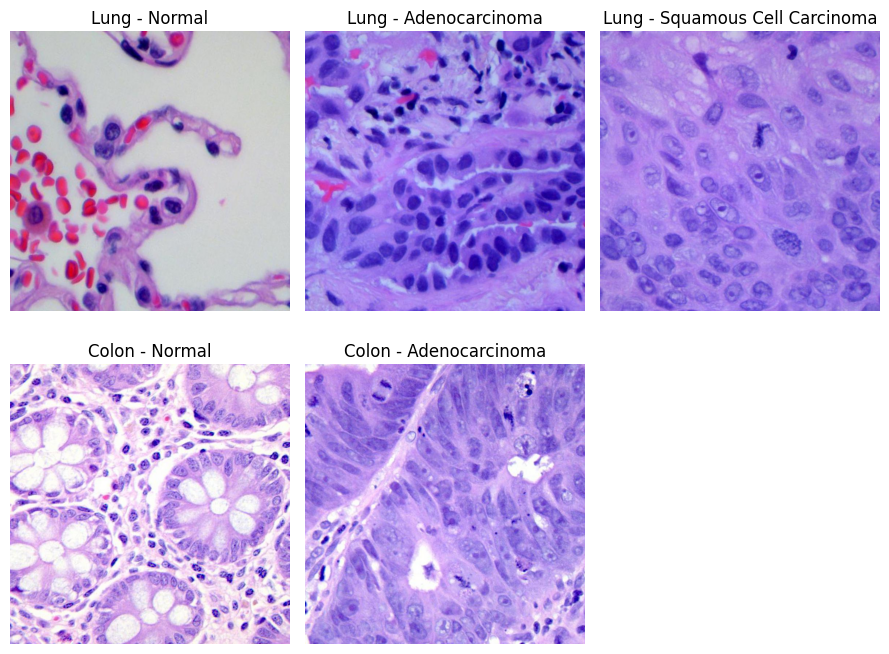

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Correct dataset path
dataset_path = '/content/lung_and_colon_cancer_data/lung_colon_image_set'

# Class folders (Lung + Colon)
classes = {
    'lung_image_sets/lung_n': 'Lung - Normal',
    'lung_image_sets/lung_aca': 'Lung - Adenocarcinoma',
    'lung_image_sets/lung_scc': 'Lung - Squamous Cell Carcinoma',
    'colon_image_sets/colon_n': 'Colon - Normal',
    'colon_image_sets/colon_aca': 'Colon - Adenocarcinoma'
}

# Plot images
plt.figure(figsize=(9, 7))

for i, (folder, label) in enumerate(classes.items(), 1):
    folder_path = os.path.join(dataset_path, folder)

    if os.path.exists(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpeg', '.jpg', '.png'))]

        if image_files:
            img_path = os.path.join(folder_path, image_files[0])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(2, 3, i)
            plt.imshow(img)
            plt.title(label)
            plt.axis('off')
        else:
            print(f"No images found in {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")

plt.tight_layout()
plt.show()


In [ ]:
!pip install numpy pandas opencv-python matplotlib seaborn
!pip install tensorflow numpy pandas matplotlib seaborn


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_size = 224
batch_size = 32

# Data paths
train_data_dir = '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets'

# Data Generator with Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2  # 80% train, 20% validation
)

# Train and Validation Data
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

print("Data loading complete!")


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Data loading complete!


In [ ]:
!pip install tensorflow


 CNN Model Code

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(3, activation='softmax')  # 3 Classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,443 (84.86 MB)

 Trainable params: 22,245,443 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Training Code

In [ ]:
# Define callbacks to monitor training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step - accuracy: 0.7293 - loss: 0.7043 - val_accuracy: 0.8087 - val_loss: 0.4260
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 180ms/step - accuracy: 0.8726 - loss: 0.3043 - val_accuracy: 0.8543 - val_loss: 0.3283
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.9016 - loss: 0.2341 - val_accuracy: 0.9197 - val_loss: 0.1855
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 94s 182ms/step - accuracy: 0.9149 - loss: 0.2159 - val_accuracy: 0.9037 - val_loss: 0.2140
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - accuracy: 0.9215 - loss: 0.1933 - val_accuracy: 0.9357 - val_loss: 0.1581
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9303 - loss: 0.1715 - val_accuracy: 0.9250 - val_loss: 0.1820
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.9427 - loss: 0.1486 - val_accuracy: 0.9457 - val_loss: 0.1465
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.9485 - loss: 0

In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9565 - loss: 0.1297
Validation Accuracy: 95.47%
Validation Loss: 0.1397


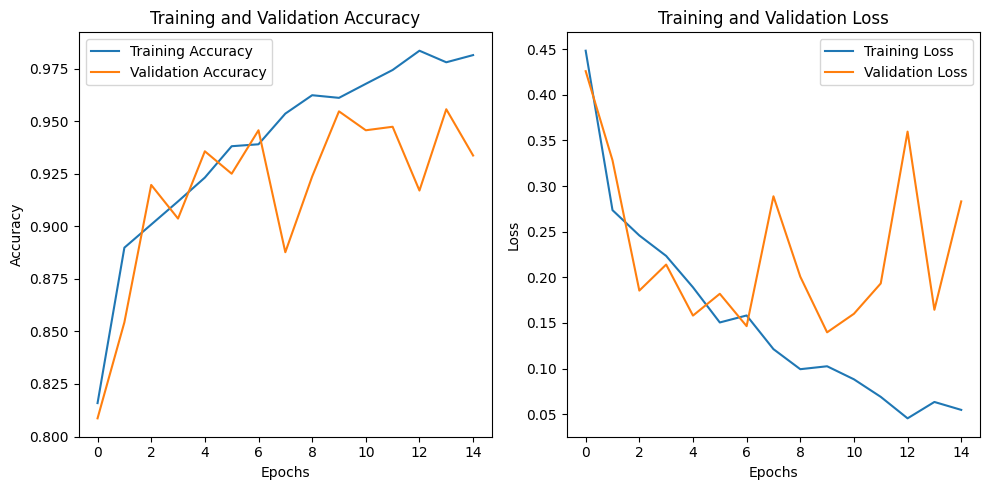

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


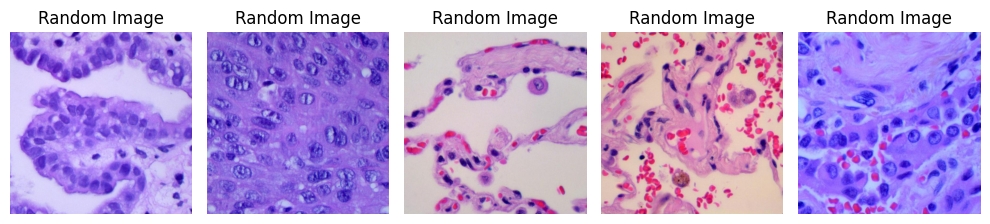

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2

# Path to dataset
base_path = '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets'

# Collect all images from all subfolders
all_images = []
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        all_images.extend(images)

# Randomly select 5 images from the entire dataset
sample_images = random.sample(all_images, 5)

# Display the images
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Random Image")
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np

# Preprocessing Function
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Resize to match the model input
        img = img / 255.0  # Normalize
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        return img
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return None


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_names = ['Normal', 'Adenocarcinoma', 'Squamous Cell Carcinoma']
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    print(f"Prediction: {predicted_class} with {confidence:.2f}% confidence.")

# Perform predictions on the selected random images
for img_path in sample_images:
    print(f"Image Path: {img_path}")
    predict_image(img_path)


Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_aca/lungaca2102.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
Prediction: Normal with 99.78% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1706.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Squamous Cell Carcinoma with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn2807.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Adenocarcinoma with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn864.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Adenocarcinoma with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_aca/lungaca4484.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Normal with 99.99% confidence.


Add Class Weights to Training

In [ ]:
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_folder}, Number of Images: {num_images}")


Class: lung_n, Number of Images: 5000
Class: lung_scc, Number of Images: 5000
Class: lung_aca, Number of Images: 5000


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_names = ['Normal', 'Adenocarcinoma', 'Squamous Cell Carcinoma']
class_counts = [5000, 5000, 5000]  # Update based on actual numbers
class_weights = compute_class_weight('balanced', classes=np.unique(class_names), y=class_names)

# Convert to dictionary
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

# Add class weights to model.fit
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 166ms/step - accuracy: 0.9741 - loss: 0.0705 - val_accuracy: 0.9227 - val_loss: 0.2164
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 165ms/step - accuracy: 0.9718 - loss: 0.0754 - val_accuracy: 0.9500 - val_loss: 0.1474
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.9793 - loss: 0.0597 - val_accuracy: 0.9517 - val_loss: 0.1683
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 96s 194ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9587 - val_loss: 0.1585
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 156ms/step - accuracy: 0.9852 - loss: 0.0423 - val_accuracy: 0.9503 - val_loss: 0.1724
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.9829 - loss: 0.0448 - val_accuracy: 0.9573 - val_loss: 0.1607
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9911 - loss: 0.0324 - val_accuracy: 0.9490 - val_loss: 0.1864


In [ ]:
import os

# Path to dataset
base_path = '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets'

# Check class distribution
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_folder}, Number of Images: {num_images}")


Class: lung_n, Number of Images: 5000
Class: lung_scc, Number of Images: 5000
Class: lung_aca, Number of Images: 5000


Apply Class Weights and Retrain

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define class labels
class_labels = ['Normal', 'Adenocarcinoma', 'Squamous Cell Carcinoma']

# Calculate class weights
class_weight = compute_class_weight('balanced', classes=np.array([0, 1, 2]), y=[0]*5000 + [1]*5000 + [2]*5000)
class_weight_dict = {i: weight for i, weight in enumerate(class_weight)}

print("Class Weights:", class_weight_dict)

# Define callbacks to monitor training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Retrain the model with class weights
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)


Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 178ms/step - accuracy: 0.9686 - loss: 0.0796 - val_accuracy: 0.9580 - val_loss: 0.1285
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9846 - loss: 0.0403 - val_accuracy: 0.9540 - val_loss: 0.2114
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 160ms/step - accuracy: 0.9840 - loss: 0.0500 - val_accuracy: 0.9563 - val_loss: 0.1742
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 166ms/step - accuracy: 0.9858 - loss: 0.0394 - val_accuracy: 0.9587 - val_loss: 0.1771
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9457 - val_loss: 0.2444
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 159ms/step - accuracy: 0.9814 - loss: 0.0624 - val_accuracy: 0.9583 - val_loss: 0.1671


 Evaluate on Validation Data

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")



94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9572 - loss: 0.1356
Validation Loss: 0.1285
Validation Accuracy: 0.9580


Generate a Classification Report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation data
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

# Class names
class_names = ['Normal', 'Adenocarcinoma', 'Squamous Cell Carcinoma']

# Get classification report as a dictionary
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Print only the F1-scores
print("F1 Scores:")
for class_name in class_names:
    print(f"{class_name}: {report[class_name]['f1-score']:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step
F1 Scores:
Normal: 0.3323
Adenocarcinoma: 0.3419
Squamous Cell Carcinoma: 0.3468


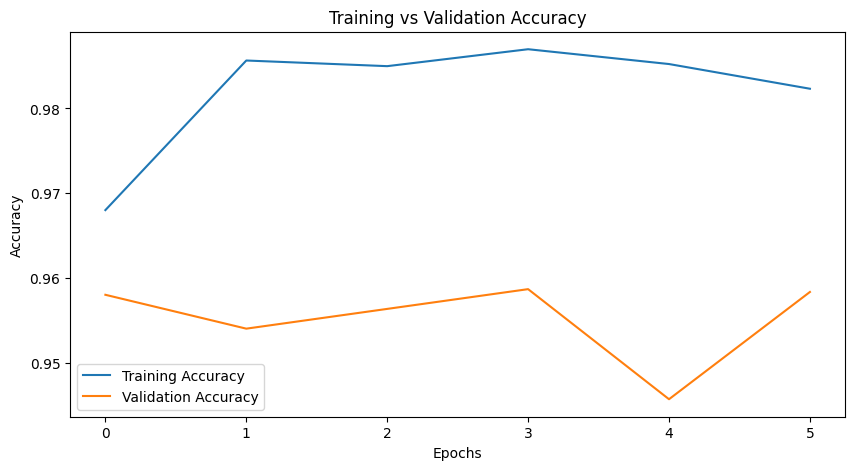

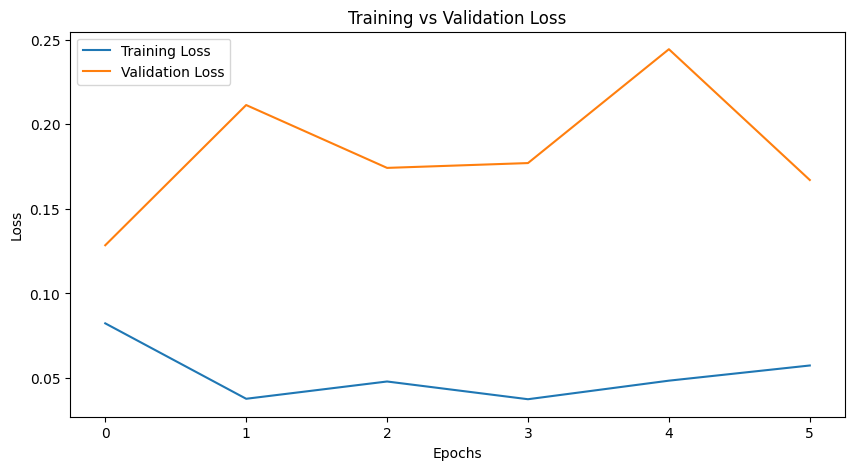

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Picking Random Images from the Entire Dataset

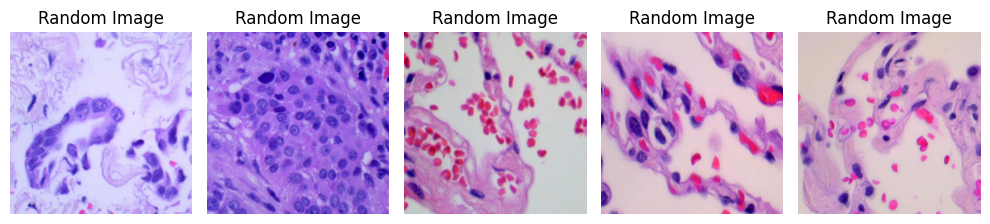

Selected Image Paths: ['/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_aca/lungaca4309.jpeg', '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc2232.jpeg', '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn2581.jpeg', '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn2992.jpeg', '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn349.jpeg']


In [ ]:
import random
import os
import cv2
import matplotlib.pyplot as plt

# Path to dataset
base_path = '/content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets'

# Collect all image paths
all_images = []
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        all_images.extend(images)

# Randomly select 5 images
sample_images = random.sample(all_images, 5)

# Display the images
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Random Image")
plt.tight_layout()
plt.show()

print("Selected Image Paths:", sample_images)


Predictions

In [ ]:
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Adjust if your model uses a different size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_names = ['Normal', 'Adenocarcinoma', 'Squamous Cell Carcinoma']
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    print(f"Prediction: {predicted_class} with {confidence:.2f}% confidence.")


# Perform predictions on the selected random images
for img_path in sample_images:
    predict_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Normal with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_aca/lungaca4309.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: Squamous Cell Carcinoma with 99.99% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc2232.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Adenocarcinoma with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn2581.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Adenocarcinoma with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn2992.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: Adenocarcinoma with 100.00% confidence.
Image Path: /content/lung_and_colon_cancer_data/lung_colon_image_set/lung_image_sets/lung_n/lungn349.jpeg



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Get true labels
y_true = val_generator.classes

# Predict on the validation set
y_pred = np.argmax(model.predict(val_generator), axis=1)

# Class names
class_names = ['Normal', 'Adenocarcinoma', 'Squamous Cell Carcinoma']

print("Prediction Complete.")


94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step
Prediction Complete.


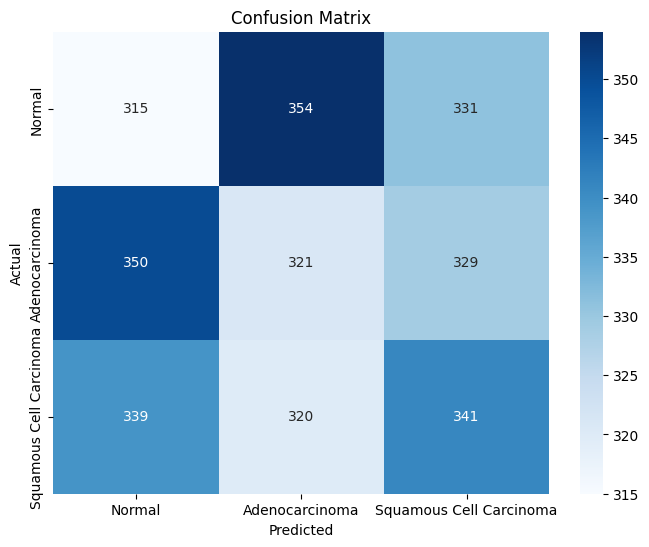

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
